# 선형회귀

- 현대 중공업과 계약을 맺어 일부 선박에 대한 예측 모델을 구축하게됐습니다. 현대 중공업은 세계 최대의 선박 제조업체 중 하나로 유람선을 제작하고 있습니다.
- 당신은 선박에 필요한 선원 수를 정확하게 예측할 수 있도록 울산에있는 본사에 도착했습니다.
- 그들은 현재 새로운 선박을 건조하고 있으며 예측 모델을 만들고, 이를 사용하여 선박에 필요한 승무원 수를 예측하기를 원합니다.

- 데이터는 "cruise_ship_info.csv"라는 csv 파일에 저장됩니다. 귀하의 임무는 향후 선박에 필요한 선원 수를 예측하는 데 도움이되는 회귀 모델을 만드는 것입니다. 고객은 또한 **특정 크루즈 라인이 허용되는 승무원 수에 차이가 있음을 발견** 했으므로 분석에 포함하는 것이 가장 중요한 기능이라고 언급했습니다!

- 평가기준 : RMSE
- train_test_split: 0.25
- random_state = 2

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
plt.rcParams['axes.unicode_minus'] = False
# 판다스에서 scientific-notation이 아닌 float 모양으로 출력되게 설정
pd.options.mode.chained_assignment = None

In [2]:
ci = pd.read_csv("./data/cruise_ship_info.csv")

In [3]:
ci

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00
...,...,...,...,...,...,...,...,...,...
153,Taurus,Star,22,3.341,0.66,2.79,0.33,50.62,0.59
154,Virgo,Star,14,76.800,19.60,8.79,9.67,39.18,12.00
155,Spirit,Windstar,25,5.350,1.58,4.40,0.74,33.86,0.88
156,Star,Windstar,27,5.350,1.67,4.40,0.74,32.04,0.88


In [4]:
ci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ship_name          158 non-null    object 
 1   Cruise_line        158 non-null    object 
 2   Age                158 non-null    int64  
 3   Tonnage            158 non-null    float64
 4   passengers         158 non-null    float64
 5   length             158 non-null    float64
 6   cabins             158 non-null    float64
 7   passenger_density  158 non-null    float64
 8   crew               158 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 11.2+ KB


In [5]:
ci.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


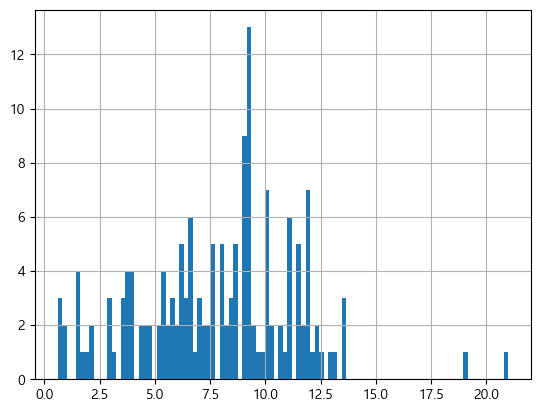

In [6]:
ci["crew"].hist(bins = 100)
plt.show()

In [7]:
# 피처 각각에 대한 히스토그램을 출력
def plot_hist(df):
    plt.rcParams["figure.figsize"] = [20, 16]
    fig = plt.figure()
    
    # df의 열 개수만큼의 subplot을 출력
    for i in range(len(df.columns)):
        ax = fig.add_subplot(4, 2, i + 1)
        plt.hist(df[df.columns[i]], bins = 50)
        ax.set_title(df.columns[i])
        
    plt.tight_layout()
    plt.show()

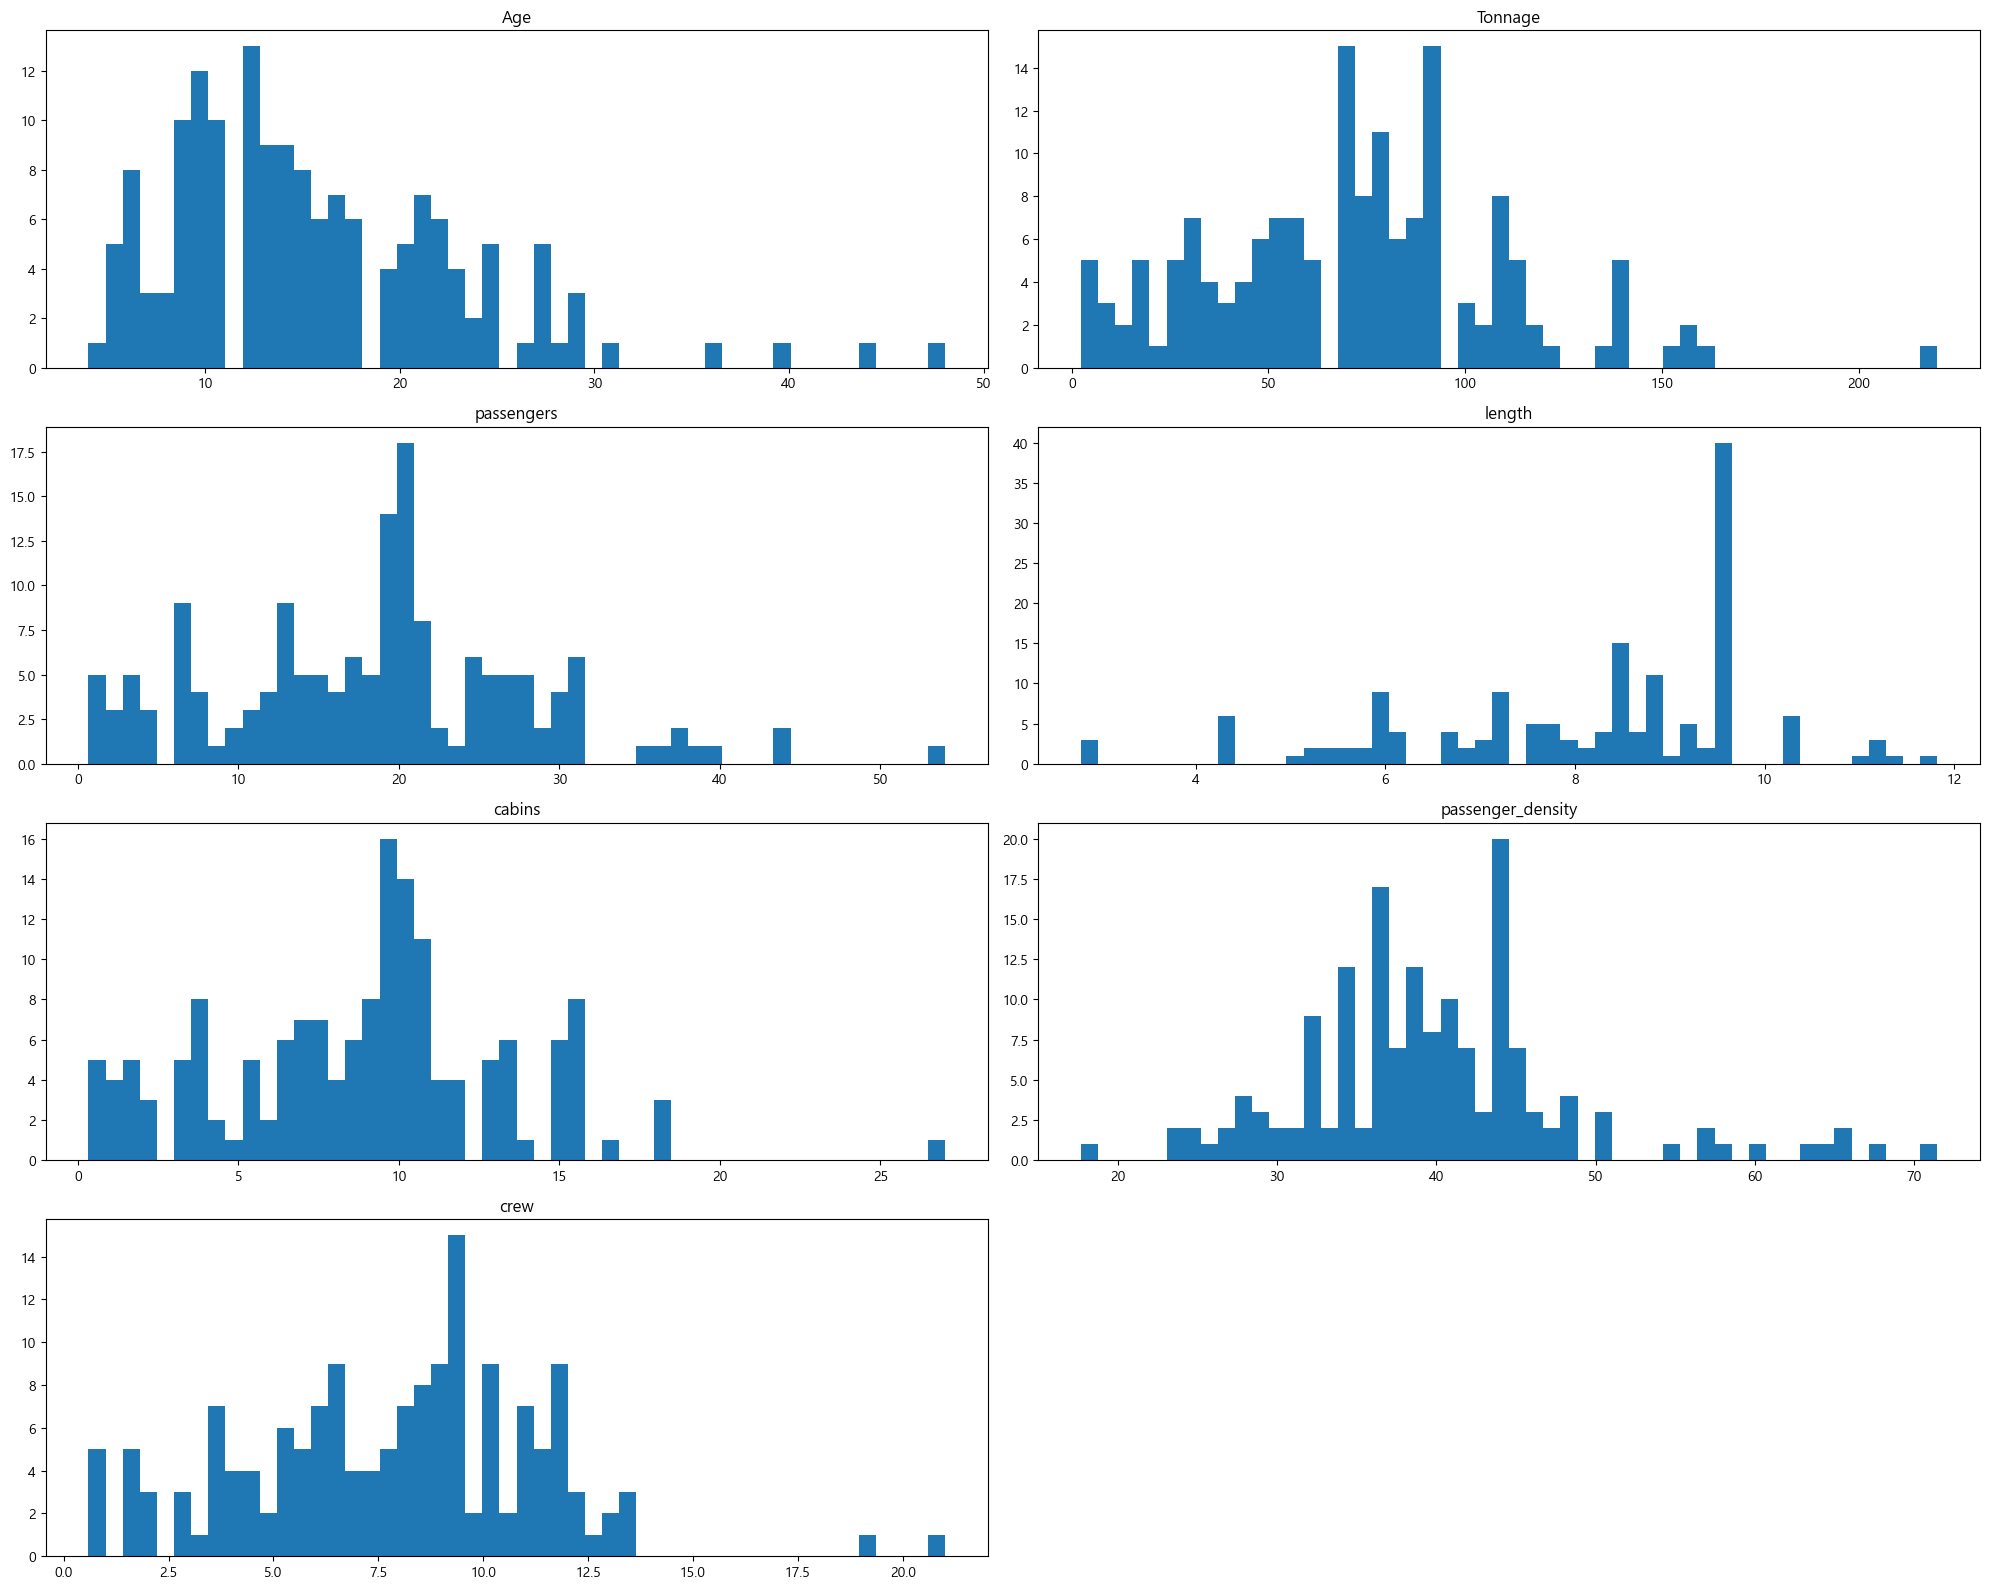

In [8]:
plot_hist(ci.iloc[:, 2:])

In [9]:
ci = ci.sort_values(by="passengers", ascending = False).reset_index(drop = True)

In [10]:
ci

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Oasis,Royal_Caribbean,4,220.000,54.00,11.82,27.00,40.74,21.00
1,Freedom,Royal_Caribbean,7,158.000,43.70,11.12,18.00,36.16,13.60
2,Liberty,Royal_Caribbean,6,158.000,43.70,11.25,18.00,36.16,13.60
3,Fantasia,MSC,5,133.500,39.59,10.93,16.37,33.72,13.13
4,Serena,Costa,6,112.000,38.00,9.51,15.00,29.47,10.90
...,...,...,...,...,...,...,...,...,...
153,Star,Windstar,27,5.350,1.67,4.40,0.74,32.04,0.88
154,Spirit,Windstar,25,5.350,1.58,4.40,0.74,33.86,0.88
155,Xpedition,Celebrity,12,2.329,0.94,2.96,0.45,24.78,0.60
156,Aries,Star,22,3.341,0.66,2.80,0.33,50.62,0.59


In [11]:
y = ci["crew"]

In [12]:
y = pd.DataFrame(y)

In [13]:
ci

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Oasis,Royal_Caribbean,4,220.000,54.00,11.82,27.00,40.74,21.00
1,Freedom,Royal_Caribbean,7,158.000,43.70,11.12,18.00,36.16,13.60
2,Liberty,Royal_Caribbean,6,158.000,43.70,11.25,18.00,36.16,13.60
3,Fantasia,MSC,5,133.500,39.59,10.93,16.37,33.72,13.13
4,Serena,Costa,6,112.000,38.00,9.51,15.00,29.47,10.90
...,...,...,...,...,...,...,...,...,...
153,Star,Windstar,27,5.350,1.67,4.40,0.74,32.04,0.88
154,Spirit,Windstar,25,5.350,1.58,4.40,0.74,33.86,0.88
155,Xpedition,Celebrity,12,2.329,0.94,2.96,0.45,24.78,0.60
156,Aries,Star,22,3.341,0.66,2.80,0.33,50.62,0.59


In [14]:
ci = ci.drop("crew", axis = 1)

- passenger_density 컬럼을 삭제하는 것보다는 다른 컬럼과 결합하여 유의미한 컬럼을 만들고자 함

In [15]:
ci["area"] = ci["passengers"] / ci["passenger_density"]

In [16]:
pd.concat([ci.iloc[:, 2:], y], axis = 1).corr()

,Age,Tonnage,passengers,length,cabins,passenger_density,area,crew
Age,1.000000,-0.606646,-0.515542,-0.532286,-0.510019,-0.278830,-0.369655,-0.530657
Tonnage,-0.606646,1.000000,0.945061,0.922368,0.948764,-0.040846,0.795157,0.927569
passengers,-0.515542,0.945061,1.000000,0.883535,0.976341,-0.294867,0.947089,0.915234
length,-0.532286,0.922368,0.883535,1.000000,0.889798,-0.090488,0.753261,0.895857
cabins,-0.510019,0.948764,0.976341,0.889798,1.000000,-0.253181,0.889150,0.950823
passenger_density,-0.278830,-0.040846,-0.294867,-0.090488,-0.253181,1.000000,-0.500068,-0.155509
area,-0.369655,0.795157,0.947089,0.753261,0.889150,-0.500068,1.000000,0.797649
crew,-0.530657,0.927569,0.915234,0.895857,0.950823,-0.155509,0.797649,1.000000


- crew 컬럼과 correlation이 유의미하다고 보이지 않는 Age 컬럼과 passenger_density 컬럼은 삭제하도록 함

In [17]:
ci = ci.drop(columns = ["Age", "passenger_density"])

In [18]:
ci

,Ship_name,Cruise_line,Tonnage,passengers,length,cabins,area
0,Oasis,Royal_Caribbean,220.000,54.00,11.82,27.00,1.325479
1,Freedom,Royal_Caribbean,158.000,43.70,11.12,18.00,1.208518
2,Liberty,Royal_Caribbean,158.000,43.70,11.25,18.00,1.208518
3,Fantasia,MSC,133.500,39.59,10.93,16.37,1.174081
4,Serena,Costa,112.000,38.00,9.51,15.00,1.289447
...,...,...,...,...,...,...,...
153,Star,Windstar,5.350,1.67,4.40,0.74,0.052122
154,Spirit,Windstar,5.350,1.58,4.40,0.74,0.046663
155,Xpedition,Celebrity,2.329,0.94,2.96,0.45,0.037934
156,Aries,Star,3.341,0.66,2.80,0.33,0.013038


# 원핫인코딩

In [19]:
ohe = OneHotEncoder()

In [20]:
ci["Cruise_line"].unique()

array(['Royal_Caribbean', 'MSC', 'Costa', 'Princess', 'Carnival', 'P&O',
       'Celebrity', 'Cunard', 'Norwegian', 'Holland_American', 'Star',
       'Disney', 'Crystal', 'Orient', 'Regent_Seven_Seas', 'Azamara',
       'Oceania', 'Silversea', 'Windstar', 'Seabourn'], dtype=object)

In [21]:
line_arr = np.array(ci["Cruise_line"])

In [22]:
line_arr = np.reshape(line_arr, (-1, 1))

In [23]:
line_arr

array([['Royal_Caribbean'],
       ['Royal_Caribbean'],
       ['Royal_Caribbean'],
       ['MSC'],
       ['Costa'],
       ['Princess'],
       ['Carnival'],
       ['Royal_Caribbean'],
       ['P&O'],
       ['Royal_Caribbean'],
       ['Royal_Caribbean'],
       ['Royal_Caribbean'],
       ['Royal_Caribbean'],
       ['Royal_Caribbean'],
       ['Princess'],
       ['Carnival'],
       ['Carnival'],
       ['Carnival'],
       ['Carnival'],
       ['Royal_Caribbean'],
       ['Celebrity'],
       ['Princess'],
       ['Carnival'],
       ['Carnival'],
       ['Royal_Caribbean'],
       ['Royal_Caribbean'],
       ['Costa'],
       ['Costa'],
       ['Princess'],
       ['Princess'],
       ['Carnival'],
       ['Cunard'],
       ['Princess'],
       ['Princess'],
       ['Princess'],
       ['MSC'],
       ['Royal_Caribbean'],
       ['Royal_Caribbean'],
       ['Royal_Caribbean'],
       ['Royal_Caribbean'],
       ['Royal_Caribbean'],
       ['Royal_Caribbean'],
       ['Norwegia

In [24]:
line_name = ohe.fit_transform(line_arr)

In [25]:
line_name

<158x20 sparse matrix of type '<class 'numpy.float64'>'
	with 158 stored elements in Compressed Sparse Row format>

In [26]:
ohe.get_feature_names_out()

array(['x0_Azamara', 'x0_Carnival', 'x0_Celebrity', 'x0_Costa',
       'x0_Crystal', 'x0_Cunard', 'x0_Disney', 'x0_Holland_American',
       'x0_MSC', 'x0_Norwegian', 'x0_Oceania', 'x0_Orient', 'x0_P&O',
       'x0_Princess', 'x0_Regent_Seven_Seas', 'x0_Royal_Caribbean',
       'x0_Seabourn', 'x0_Silversea', 'x0_Star', 'x0_Windstar'],
      dtype=object)

In [27]:
ohe_line_df = pd.DataFrame(line_name.toarray(), columns = ohe.get_feature_names_out())

In [28]:
ohe_line_df.shape

(158, 20)

In [29]:
ohe_line_df.head()

,x0_Azamara,x0_Carnival,x0_Celebrity,x0_Costa,x0_Crystal,x0_Cunard,x0_Disney,x0_Holland_American,x0_MSC,x0_Norwegian,x0_Oceania,x0_Orient,x0_P&O,x0_Princess,x0_Regent_Seven_Seas,x0_Royal_Caribbean,x0_Seabourn,x0_Silversea,x0_Star,x0_Windstar
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
ci = pd.concat([ci, ohe_line_df], axis = 1)

In [31]:
ci

,Ship_name,Cruise_line,Tonnage,passengers,length,cabins,area,x0_Azamara,x0_Carnival,x0_Celebrity,...,x0_Oceania,x0_Orient,x0_P&O,x0_Princess,x0_Regent_Seven_Seas,x0_Royal_Caribbean,x0_Seabourn,x0_Silversea,x0_Star,x0_Windstar
0,Oasis,Royal_Caribbean,220.000,54.00,11.82,27.00,1.325479,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Freedom,Royal_Caribbean,158.000,43.70,11.12,18.00,1.208518,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Liberty,Royal_Caribbean,158.000,43.70,11.25,18.00,1.208518,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Fantasia,MSC,133.500,39.59,10.93,16.37,1.174081,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Serena,Costa,112.000,38.00,9.51,15.00,1.289447,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Star,Windstar,5.350,1.67,4.40,0.74,0.052122,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
154,Spirit,Windstar,5.350,1.58,4.40,0.74,0.046663,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
155,Xpedition,Celebrity,2.329,0.94,2.96,0.45,0.037934,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
156,Aries,Star,3.341,0.66,2.80,0.33,0.013038,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [32]:
ci = ci.drop("Cruise_line", axis = 1)

In [33]:
ci.head()

,Ship_name,Tonnage,passengers,length,cabins,area,x0_Azamara,x0_Carnival,x0_Celebrity,x0_Costa,...,x0_Oceania,x0_Orient,x0_P&O,x0_Princess,x0_Regent_Seven_Seas,x0_Royal_Caribbean,x0_Seabourn,x0_Silversea,x0_Star,x0_Windstar
0,Oasis,220.0,54.00,11.82,27.00,1.325479,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Freedom,158.0,43.70,11.12,18.00,1.208518,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Liberty,158.0,43.70,11.25,18.00,1.208518,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Fantasia,133.5,39.59,10.93,16.37,1.174081,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Serena,112.0,38.00,9.51,15.00,1.289447,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
ci.shape

(158, 26)

In [35]:
x = ci.drop("Ship_name", axis = 1)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 2)

# 데이터 전처리

## 스케일링

In [37]:
ci_ss = StandardScaler()
scaled_train = ci_ss.fit_transform(x_train)
scaled_test = ci_ss.transform(x_test)

In [38]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.9646597907563701

In [39]:
lr.score(x_train, y_train)

0.9398836263109296

In [40]:
pred = lr.predict(x_test)

In [41]:
mean_squared_error(y_test, pred)

0.36783476663106573

# 릿지 회귀

In [42]:
train_hist = []
test_hist = []

alpha_li = [0.001, 0.01, 0.1, 0.2, 0.3, 1, 2, 3, 4, 10, 100]

for alpha in alpha_li:
    # 모델 생성
    rid = Ridge(alpha = alpha)
    # 훈련
    rid.fit(x_train, y_train)
    # 모델 성능을 저장
    train_hist.append(rid.score(x_train, y_train))
    test_hist.append(rid.score(x_test, y_test))

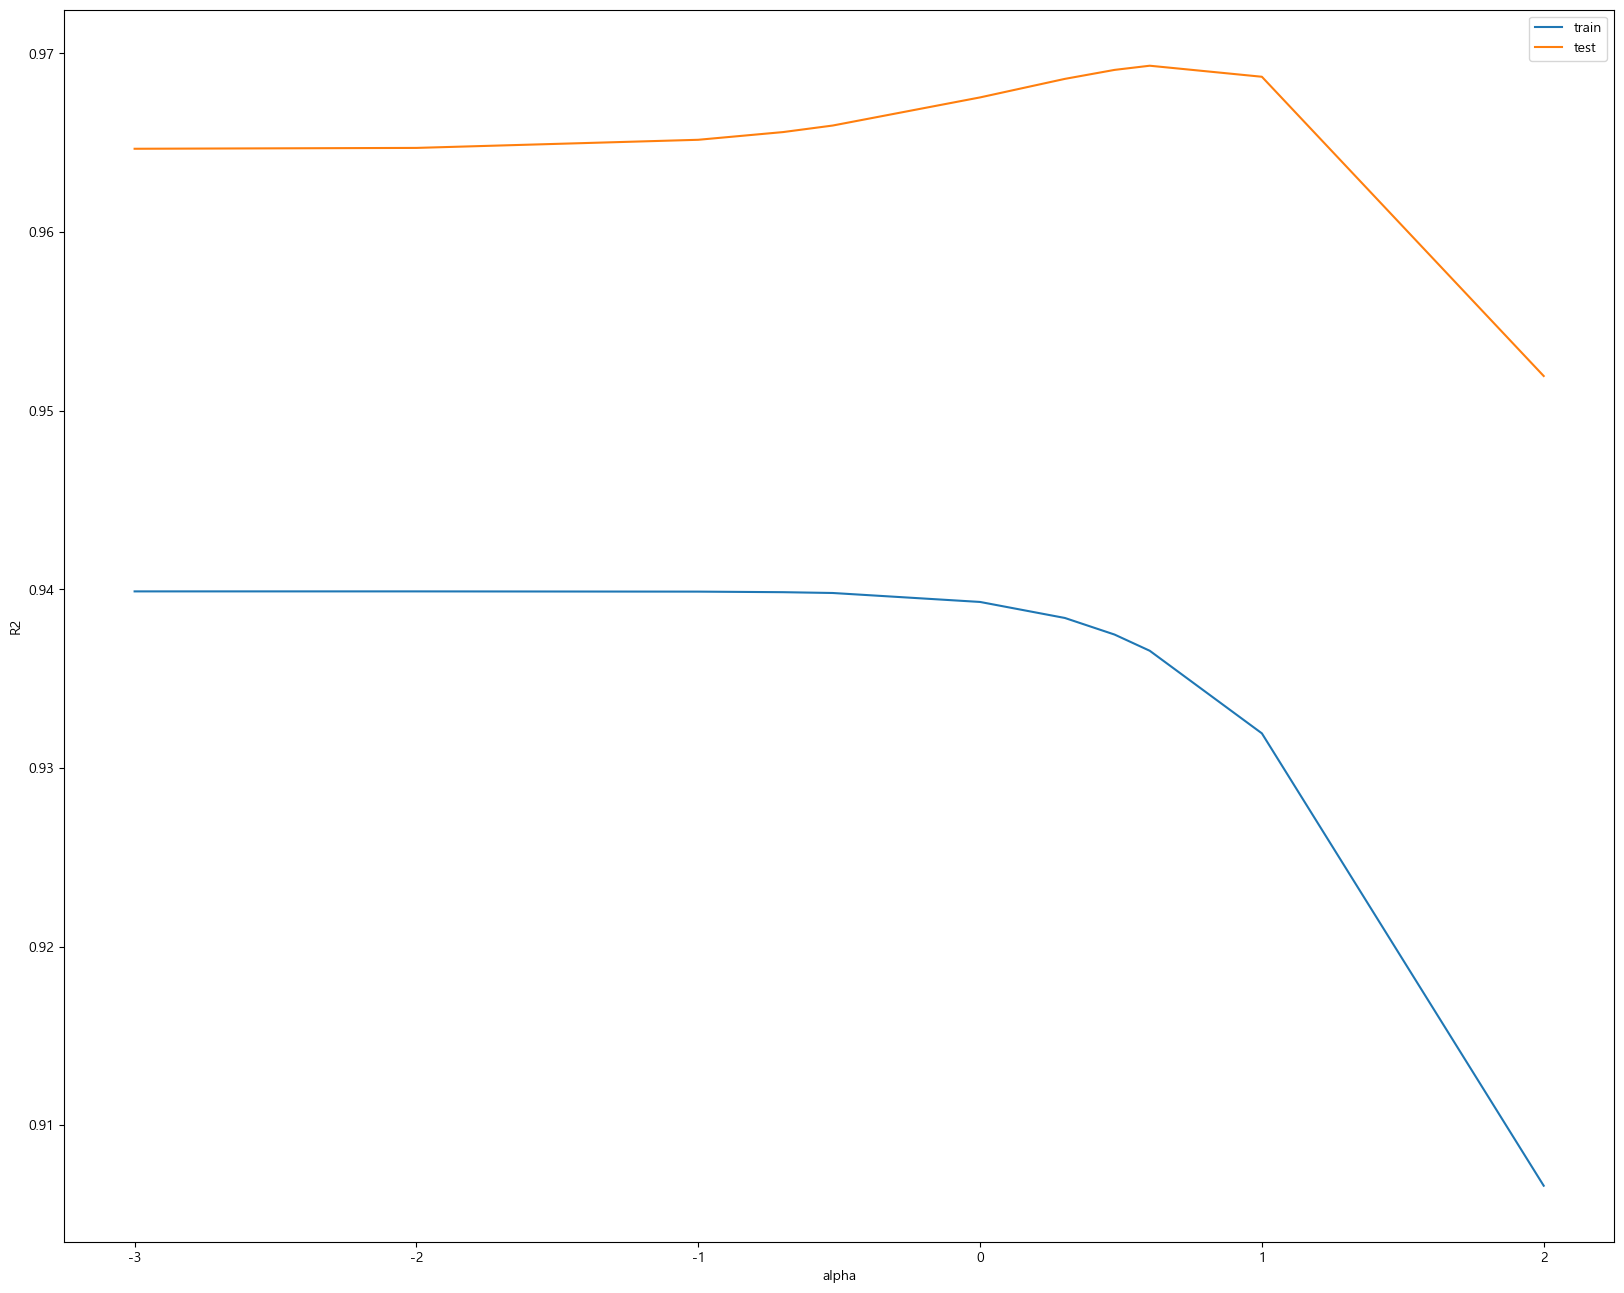

In [43]:
plt.figure()
# alpha 값을 그대로 x에 적용하면 간격이 서로 다르기 때문에
# 로그 함수로 바꾸어서 시각화
plt.plot(np.log10(alpha_li), train_hist)
plt.plot(np.log10(alpha_li), test_hist)
plt.xlabel("alpha")
plt.ylabel("R2")
plt.legend(labels = ["train", "test"])
plt.show()

In [44]:
rid = Ridge(alpha = 2.6)
rid.fit(scaled_train, y_train)
print(rid.score(scaled_train, y_train))
print(rid.score(scaled_test, y_test))

0.9358028842377226
0.9689130605434298


In [45]:
pred = rid.predict(scaled_test)

In [46]:
mse = mean_squared_error(y_test, pred, squared=False)

In [47]:
mse

0.5688277995534191

# 라쏘 회귀

In [48]:
las = Lasso()
las.fit(scaled_train, y_train)
print(las.score(scaled_train, y_train))
print(las.score(scaled_test, y_test))

0.8260522679209144
0.8679193069104993


## 라쏘 모델 하이퍼파라미터 튜닝

In [49]:
train_hist = []
test_hist = []

alpha_li = [0.0001, 0.001, 0.005, 0.01, 0.03, 0.05, 0.1, 1, 10, 100, 1000, 10000]

for alpha in alpha_li:
    # 모델 생성
    las = Lasso(alpha = alpha)
    # 훈련
    las.fit(scaled_train, y_train)
    # 모델 성능을 저장
    train_hist.append(las.score(scaled_train, y_train))
    test_hist.append(las.score(scaled_test, y_test))

C:\Users\polar\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.393e+01, tolerance: 1.510e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\polar\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.087e-01, tolerance: 1.510e-01
  model = cd_fast.enet_coordinate_descent(


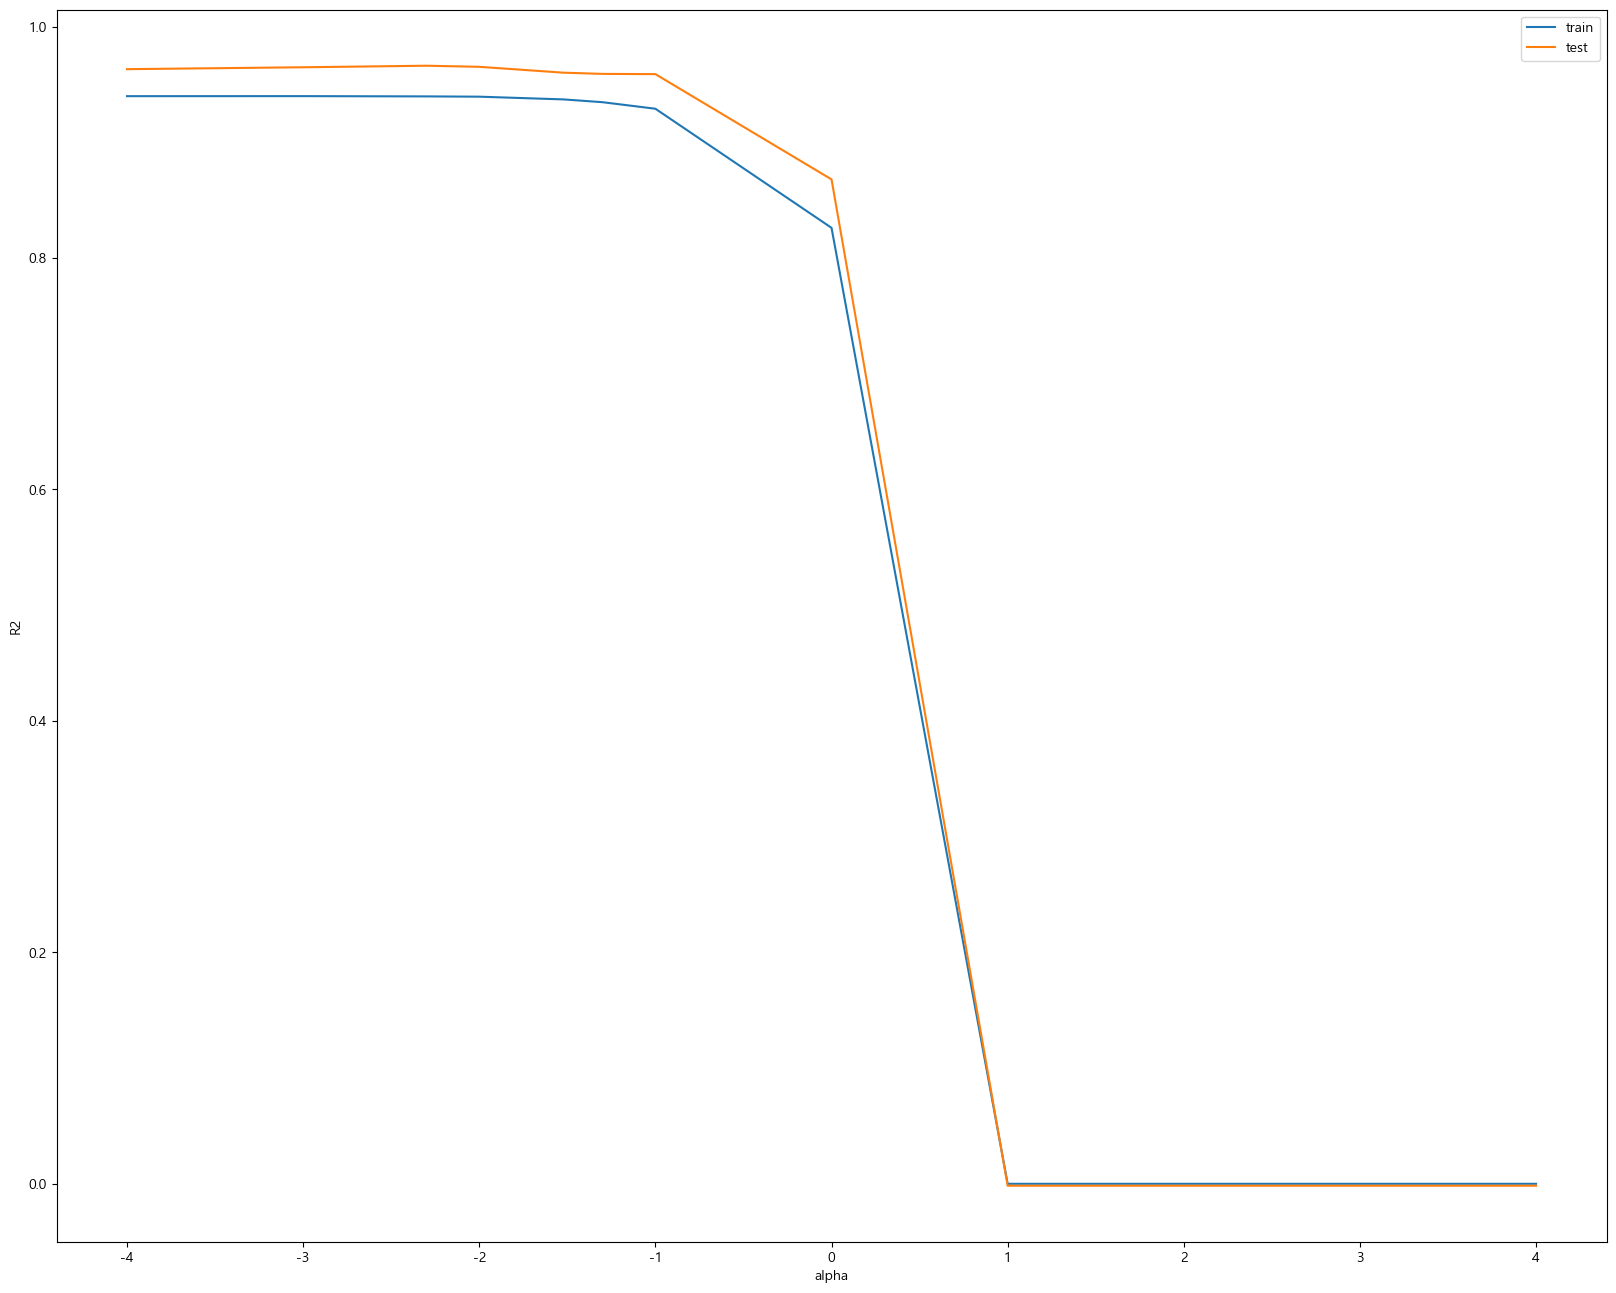

In [50]:
plt.figure()
# alpha 값을 그대로 x에 적용하면 간격이 서로 다르기 때문에
# 로그 함수로 바꾸어서 시각화
plt.plot(np.log10(alpha_li), train_hist)
plt.plot(np.log10(alpha_li), test_hist)
plt.xlabel("alpha")
plt.ylabel("R2")
plt.legend(labels = ["train", "test"])
plt.show()

In [51]:
# 모델 성능이 가장 높은 지점 확인
las = Lasso(alpha = 0.1)
las.fit(scaled_train, y_train)
print(las.score(scaled_train, y_train))
print(las.score(scaled_test, y_test))

0.9289656209451945
0.958866194186055


In [52]:
pred = las.predict(scaled_test)

In [55]:
mse = mean_squared_error(y_test, pred, squared=False)

In [56]:
mse

0.6543216283751128

- 릿지 모형 alpha=2.6일 때 mse 0.32356506554478476